In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_excel(r"C:\Users\saish\Downloads\Major Project\Techfit_dataset.xlsx")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

Dataset Shape: (20000, 35)

Dataset Columns: ['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', 'Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'can work long time before system?', 'self-learning capability?', 'certifications', 'workshops', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'Interested subjects', 'interested career area ', 'Job/Higher Studies?', 'Type of company want to settle in?', 'interested in games', 'Interested Type of Books', 'Management or Technical', 'Salary/work', 'worked in teams ever?', 'Introvert', 'Suggested Job Role', 'Skill Gaps', 'Career_Growth_Potential', 'Expected_Salary_Growth_%']

First 5 rows:
 

In [2]:
# Handle missing values if any
# (Based on the initial check, there don't seem to be missing values, but we'll include this step for completeness)
if df.isnull().sum().sum() > 0:
    # For numerical columns, fill with mean
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mean(), inplace=True)
    
    # For categorical columns, fill with mode
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Remove duplicates if any
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed {df.duplicated().sum()} duplicate rows")

# Check for special characters in categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    # Check for any non-alphanumeric characters (excluding spaces)
    special_chars = df[col].astype(str).str.contains('[^a-zA-Z0-9 ]').any()
    if special_chars:
        print(f"Column '{col}' contains special characters")
        # For simplicity, we'll just note this but won't remove them as they might be meaningful

# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(f"\nCategorical columns: {cat_cols.tolist()}")
print(f"Numerical columns: {num_cols.tolist()}")

Column 'Interested Type of Books' contains special characters
Column 'Suggested Job Role' contains special characters
Column 'Skill Gaps' contains special characters

Categorical columns: ['can work long time before system?', 'certifications', 'workshops', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'Interested subjects', 'interested career area ', 'Job/Higher Studies?', 'Type of company want to settle in?', 'interested in games', 'Interested Type of Books', 'Management or Technical', 'Salary/work', 'worked in teams ever?', 'Introvert', 'Suggested Job Role', 'Skill Gaps', 'Career_Growth_Potential']
Numerical columns: ['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', '

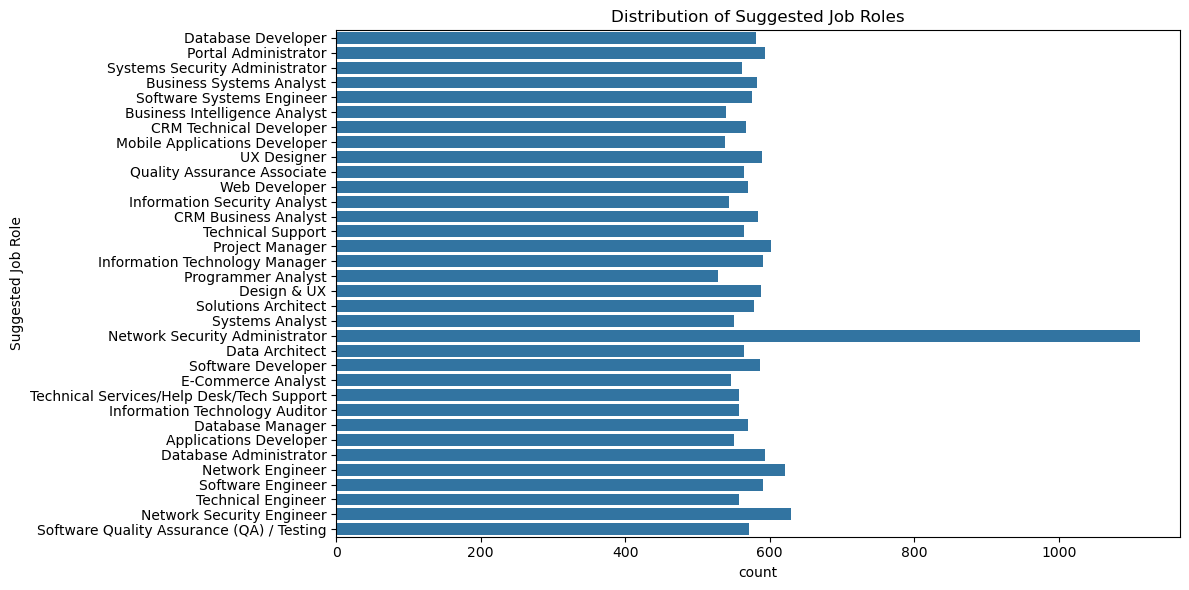

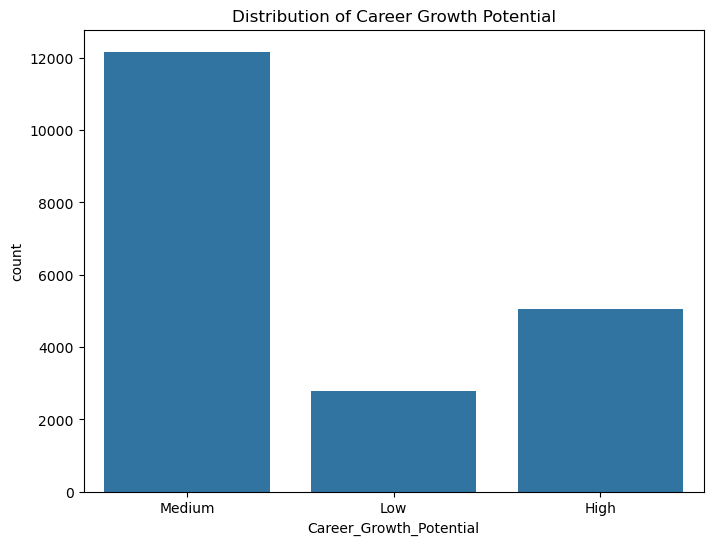

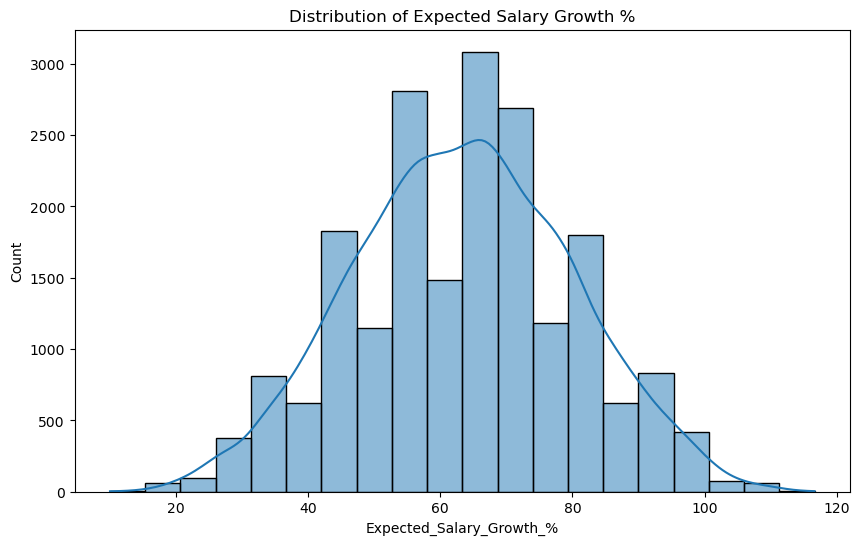

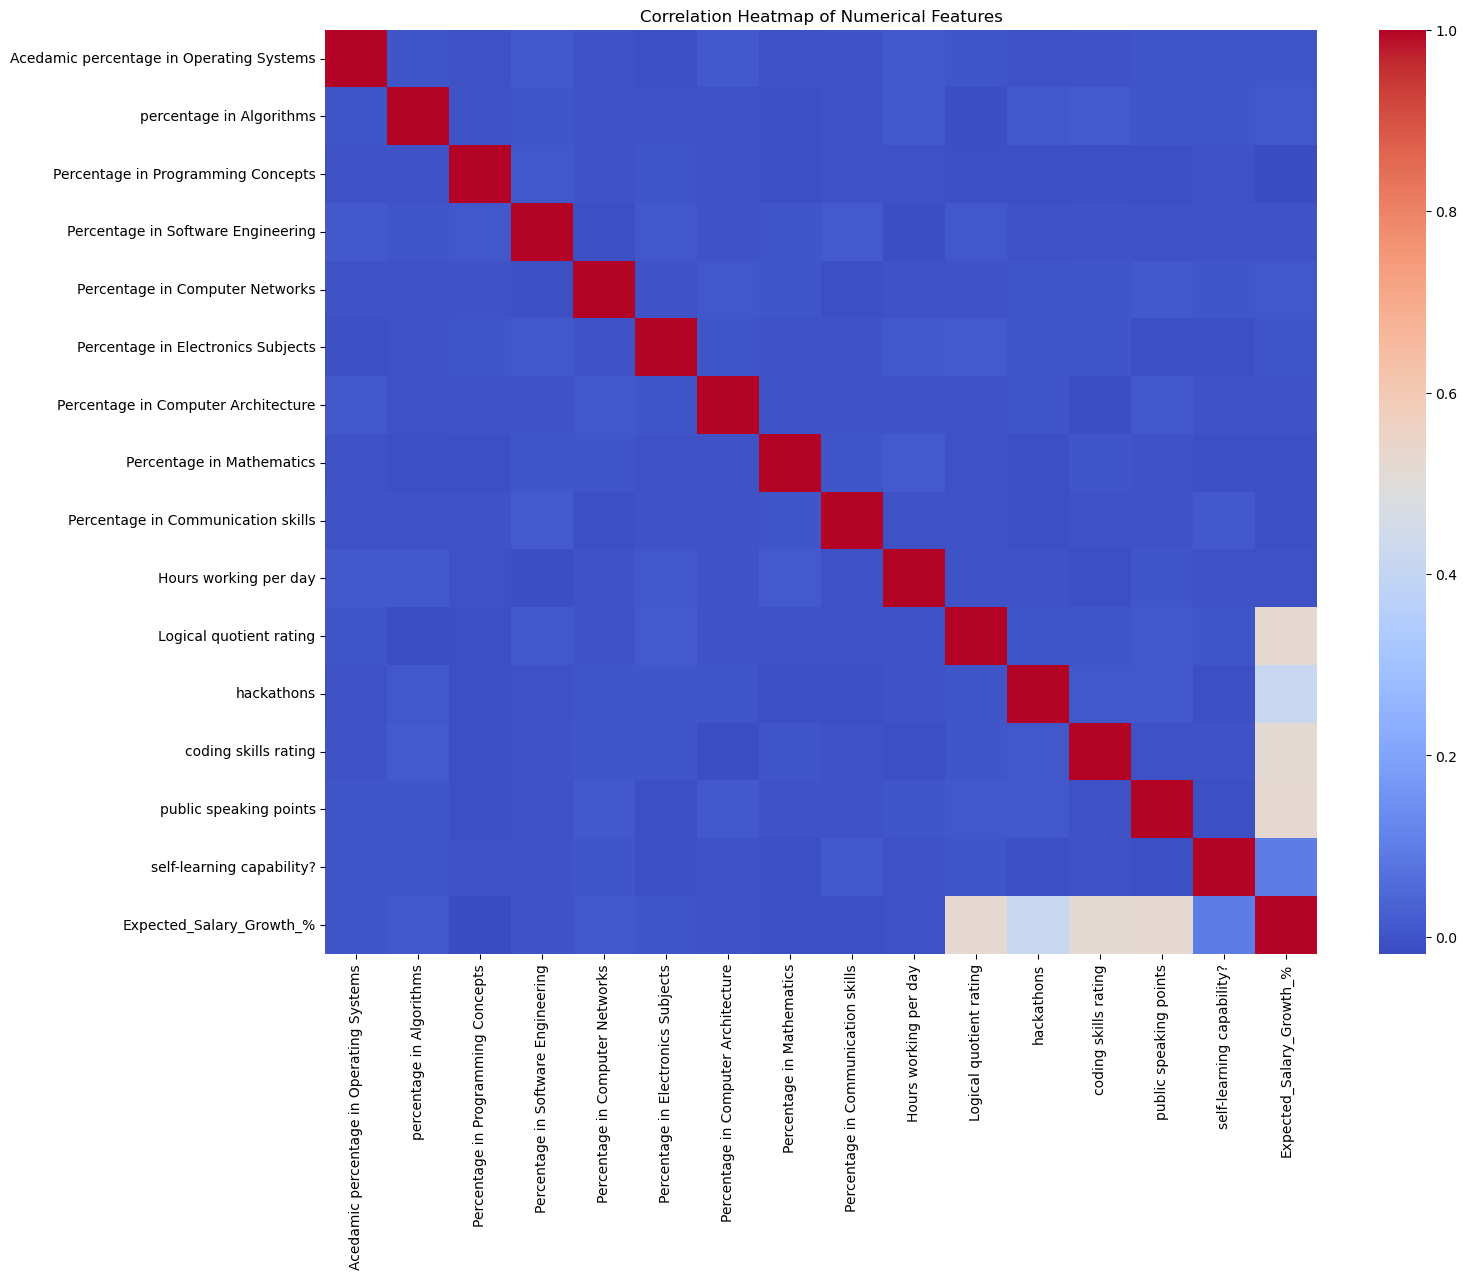

In [3]:
# Visualize the distribution of the target variable
plt.figure(figsize=(12, 6))
sns.countplot(y='Suggested Job Role', data=df)
plt.title('Distribution of Suggested Job Roles')
plt.tight_layout()
plt.show()

# Visualize career growth potential
plt.figure(figsize=(8, 6))
sns.countplot(x='Career_Growth_Potential', data=df)
plt.title('Distribution of Career Growth Potential')
plt.show()

# Visualize expected salary growth
plt.figure(figsize=(10, 6))
sns.histplot(df['Expected_Salary_Growth_%'], bins=20, kde=True)
plt.title('Distribution of Expected Salary Growth %')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(16, 12))
sns.heatmap(df[num_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [4]:
# Encode categorical variables
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define target variables
target_classification = 'Suggested Job Role'  # Classification target
target_regression = 'Expected_Salary_Growth_%'  # Regression target

# Prepare features for classification
X_class = df.drop(columns=[target_classification, target_regression])
y_class = df[target_classification]

# Prepare features for regression
X_reg = df.drop(columns=[target_classification, target_regression])
y_reg = df[target_regression]

# Feature selection for classification
selector_class = SelectKBest(f_classif, k=15)
X_class_selected = selector_class.fit_transform(X_class, y_class)
selected_features_class = X_class.columns[selector_class.get_support()]
print(f"\nSelected features for classification: {selected_features_class.tolist()}")

# Feature selection for regression
selector_reg = SelectKBest(f_regression, k=15)
X_reg_selected = selector_reg.fit_transform(X_reg, y_reg)
selected_features_reg = X_reg.columns[selector_reg.get_support()]
print(f"Selected features for regression: {selected_features_reg.tolist()}")

# Split the data into training and testing sets
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    X_class_selected, y_class, test_size=0.2, random_state=42
)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg_selected, y_reg, test_size=0.2, random_state=42
)

# Scale the features
scaler_class = StandardScaler()
X_class_train = scaler_class.fit_transform(X_class_train)
X_class_test = scaler_class.transform(X_class_test)

scaler_reg = StandardScaler()
X_reg_train = scaler_reg.fit_transform(X_reg_train)
X_reg_test = scaler_reg.transform(X_reg_test)


Selected features for classification: ['Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Electronics Subjects', 'Hours working per day', 'Logical quotient rating', 'hackathons', 'public speaking points', 'self-learning capability?', 'talenttests taken?', 'reading and writing skills', 'Type of company want to settle in?', 'interested in games', 'Interested Type of Books', 'Management or Technical', 'worked in teams ever?']
Selected features for regression: ['Percentage in Programming Concepts', 'Percentage in Computer Networks', 'Percentage in Communication skills', 'Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'self-learning capability?', 'workshops', 'Job/Higher Studies?', 'Type of company want to settle in?', 'interested in games', 'worked in teams ever?', 'Skill Gaps', 'Career_Growth_Potential']


In [5]:
# Define classification models
class_models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate classification models
class_results = {}
for name, model in class_models.items():
    model.fit(X_class_train, y_class_train)
    y_pred = model.predict(X_class_test)
    accuracy = accuracy_score(y_class_test, y_pred)
    class_results[name] = accuracy
    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(classification_report(y_class_test, y_pred))
    print("\n" + "="*50 + "\n")

# Find the best classification model
best_class_model = max(class_results, key=class_results.get)
print(f"Best classification model: {best_class_model} with accuracy {class_results[best_class_model]:.4f}")

Logistic Regression - Accuracy: 0.0525
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.00      0.00      0.00        97
           2       0.00      0.00      0.00       123
           3       0.07      0.01      0.02       104
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       115
           6       0.00      0.00      0.00       122
           7       0.00      0.00      0.00       112
           8       0.00      0.00      0.00       122
           9       0.00      0.00      0.00       122
          10       0.00      0.00      0.00       112
          11       0.00      0.00      0.00       103
          12       0.00      0.00      0.00       113
          13       0.00      0.00      0.00       120
          14       0.00      0.00      0.00       112
          15       0.02      0.01      0.01       115
          16       0.05      0.96      0.1

In [10]:
# Define regression models
reg_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Train and evaluate regression models
reg_results = {}
for name, model in reg_models.items():
    model.fit(X_reg_train, y_reg_train)
    y_pred = model.predict(X_reg_test)
    mse = mean_squared_error(y_reg_test, y_pred)
    r2 = r2_score(y_reg_test, y_pred)
    reg_results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")
    print("\n" + "="*50 + "\n")

# Find the best regression model based on R2 score
best_reg_model = max(reg_results, key=lambda x: reg_results[x]['R2'])
print(f"Best regression model: {best_reg_model} with R2 score {reg_results[best_reg_model]['R2']:.4f}")


Linear Regression - MSE: 2.6619, R2: 0.9905


Random Forest - MSE: 5.5510, R2: 0.9802


SVR - MSE: 5.2756, R2: 0.9812


KNN - MSE: 31.3596, R2: 0.8884


Decision Tree - MSE: 15.1317, R2: 0.9461


Best regression model: Linear Regression with R2 score 0.9905


In [5]:
import tkinter as tk
from tkinter import ttk, messagebox
from PIL import Image, ImageTk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, mutual_info_classif, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import joblib
import os

# Function to train and save all models
def train_and_save_models():
    # Load the dataset
    df = pd.read_excel(r"C:\Users\saish\Downloads\Major Project\Techfit_dataset.xlsx")
    
    # Make a copy for preprocessing
    data = df.copy()
    
    # Preprocess the data
    # Handle missing values if any
    data = data.fillna(data.mean(numeric_only=True))
    
    # Encode categorical variables
    label_encoders = {}
    for col in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
    
    # Define targets and features
    targets = {
        'job_role': 'Suggested Job Role',
        'skill_gaps': 'Skill Gaps',
        'career_growth': 'Career_Growth_Potential',
        'salary_growth': 'Expected_Salary_Growth_%'
    }
    
    # Dictionary to store models and preprocessing objects
    models = {}
    scalers = {}
    selectors = {}
    selected_features = {}
    model_accuracies = {}
    
    # Process each target
    for target_name, target_col in targets.items():
        print(f"\nProcessing {target_name}...")
        
        # Define features (exclude all target columns)
        feature_cols = [col for col in data.columns if col not in targets.values()]
        X = data[feature_cols]
        y = data[target_col]
        
        # Select features based on the target type
        if target_name == 'salary_growth':
            # For regression, use mutual_info_regression
            selector = SelectKBest(mutual_info_regression, k=15)
        else:
            # For classification, use mutual_info_classif
            selector = SelectKBest(mutual_info_classif, k=15)
        
        X_selected = selector.fit_transform(X, y)
        selected_feature_indices = selector.get_support(indices=True)
        selected_feature_names = X.columns[selected_feature_indices].tolist()
        selected_features[target_name] = selected_feature_names
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X_selected, y, test_size=0.2, random_state=42
        )
        
        # Scale the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Define models based on target type
        if target_name == 'salary_growth':
            # Regression models
            models_to_test = {
                'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
                'Linear Regression': LinearRegression(),
                'SVR': SVR(kernel='rbf'),
                'KNN': KNeighborsRegressor(n_neighbors=5),
                'Decision Tree': DecisionTreeRegressor(random_state=42)
            }
        else:
            # Classification models
            models_to_test = {
                'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
                'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
                'SVM': SVC(kernel='rbf', probability=True, random_state=42),
                'KNN': KNeighborsClassifier(n_neighbors=5),
                'Decision Tree': DecisionTreeClassifier(random_state=42),
                'Naive Bayes': GaussianNB()
            }
        
        # Train and evaluate models
        best_model = None
        best_score = -np.inf if target_name == 'salary_growth' else 0
        best_model_name = ""
        
        for name, model in models_to_test.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            if target_name == 'salary_growth':
                # For regression, use R2 score
                score = r2_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_model = model
                    best_model_name = name
                print(f"{name} - R2: {score:.4f}")
            else:
                # For classification, use accuracy
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_model = model
                    best_model_name = name
                print(f"{name} - Accuracy: {score:.4f}")
        
        print(f"Best model for {target_name}: {best_model_name} with score {best_score:.4f}")
        
        # Store the best model and preprocessing objects
        models[target_name] = best_model
        scalers[target_name] = scaler
        selectors[target_name] = selector
        model_accuracies[target_name] = best_score
    
    # Save all models and preprocessing objects
    joblib.dump(models, 'all_models.pkl')
    joblib.dump(scalers, 'all_scalers.pkl')
    joblib.dump(selectors, 'all_selectors.pkl')
    joblib.dump(selected_features, 'all_selected_features.pkl')
    joblib.dump(label_encoders, 'all_label_encoders.pkl')
    joblib.dump(model_accuracies, 'model_accuracies.pkl')
    
    return data, models, scalers, selectors, selected_features, label_encoders, model_accuracies

# Check if model files exist, if not train the models
if not all(os.path.exists(f) for f in ['all_models.pkl', 'all_scalers.pkl', 
                                      'all_selectors.pkl', 'all_selected_features.pkl', 
                                      'all_label_encoders.pkl', 'model_accuracies.pkl']):
    print("Training models...")
    data, models, scalers, selectors, selected_features, label_encoders, model_accuracies = train_and_save_models()
    print("Model training completed and saved!")
else:
    # Load the saved models and preprocessing objects
    models = joblib.load('all_models.pkl')
    scalers = joblib.load('all_scalers.pkl')
    selectors = joblib.load('all_selectors.pkl')
    selected_features = joblib.load('all_selected_features.pkl')
    label_encoders = joblib.load('all_label_encoders.pkl')
    model_accuracies = joblib.load('model_accuracies.pkl')
    
    # Load the dataset
    data = pd.read_excel('Techfit_dataset.xlsx', sheet_name='roo_data_techfit_skill_names')

# Create the main application window
root = tk.Tk()
root.title("Tech Career Prediction System")
root.geometry("1400x900")
root.resizable(False, False)

# Set a modern color scheme
bg_color = "#1e3a5f"  # Dark blue
primary_color = "#3498db"  # Blue
secondary_color = "#2ecc71"  # Green
accent_color = "#e74c3c"  # Red
text_color = "#ecf0f1"  # Light gray
input_bg = "#34495e"  # Dark gray

root.configure(bg=bg_color)

# Create a canvas for the background
canvas = tk.Canvas(root, width=1400, height=900, bg=bg_color, highlightthickness=0)
canvas.pack(fill="both", expand=True)

# Load and set background image
try:
    bg_image = Image.open("background_image.jpg")
    bg_image = bg_image.resize((1400, 900), Image.LANCZOS)
    bg_photo = ImageTk.PhotoImage(bg_image)
    canvas.create_image(0, 0, image=bg_photo, anchor="nw")
except:
    # If image loading fails, create a gradient background
    for i in range(0, 900, 2):
        color = f"#{int(30 + i/900*20):02x}{int(58 + i/900*20):02x}{int(95 + i/900*20):02x}"
        canvas.create_line(0, i, 1400, i, fill=color, width=2)

# Create a frame for the content with rounded corners
content_frame = tk.Frame(root, bg="#2c3e50", bd=0, highlightthickness=0)
canvas.create_window(700, 450, window=content_frame, width=1300, height=800)

# Title with shadow effect
title_frame = tk.Frame(content_frame, bg="#2c3e50")
title_frame.pack(pady=20)

shadow_label = tk.Label(title_frame, text="Tech Career Prediction System", 
                       font=('Arial', 28, 'bold'), bg="#1a252f", fg="#1a252f")
shadow_label.place(x=2, y=2)

title_label = tk.Label(title_frame, text="Tech Career Prediction System", 
                       font=('Arial', 28, 'bold'), bg="#2c3e50", fg="#ecf0f1")
title_label.pack()

# Create a notebook for tabbed interface
notebook = ttk.Notebook(content_frame)
notebook.pack(padx=20, pady=10, fill="both", expand=True)

# Style the notebook
style = ttk.Style()
style.theme_use('clam')
style.configure('TNotebook', background='#2c3e50', borderwidth=0)
style.configure('TNotebook.Tab', background='#34495e', foreground='white', padding=[20, 10])
style.map('TNotebook.Tab', background=[('selected', primary_color)])

# Tab 1: Academic Performance
academic_tab = tk.Frame(notebook, bg="#2c3e50")
notebook.add(academic_tab, text="Academic Performance")

# Tab 2: Skills & Preferences
skills_tab = tk.Frame(notebook, bg="#2c3e50")
notebook.add(skills_tab, text="Skills & Preferences")

# Tab 3: Career Interests
interests_tab = tk.Frame(notebook, bg="#2c3e50")
notebook.add(interests_tab, text="Career Interests")

# Tab 4: Results
results_tab = tk.Frame(notebook, bg="#2c3e50")
notebook.add(results_tab, text="Results")

# Dictionary to store input widgets
input_widgets = {}

# Academic Performance Tab
academic_frame = tk.LabelFrame(academic_tab, text="Academic Performance", 
                               font=('Arial', 14, 'bold'), bg="#2c3e50", fg="#ecf0f1")
academic_frame.pack(padx=20, pady=20, fill="both", expand=True)

academic_fields = [
    'Academic percentage in Operating Systems',
    'percentage in Algorithms',
    'Percentage in Programming Concepts',
    'Percentage in Software Engineering',
    'Percentage in Computer Networks',
    'Percentage in Electronics Subjects',
    'Percentage in Computer Architecture',
    'Percentage in Mathematics',
    'Percentage in Communication skills'
]

for i, field in enumerate(academic_fields):
    label = tk.Label(academic_frame, text=field, bg="#2c3e50", fg="#ecf0f1", 
                    font=('Arial', 11), anchor='w')
    label.grid(row=i, column=0, sticky='w', pady=10, padx=20)
    
    # Create a frame for the slider and value label
    slider_frame = tk.Frame(academic_frame, bg="#2c3e50")
    slider_frame.grid(row=i, column=1, sticky='ew', pady=10, padx=20)
    
    # Create a slider
    slider = tk.Scale(slider_frame, from_=0, to=100, orient=tk.HORIZONTAL, 
                     bg="#34495e", fg="#ecf0f1", highlightthickness=0,
                     troughcolor="#1a252f", activebackground=primary_color,
                     length=300)
    slider.set(70)  # Default value
    slider.pack(side=tk.LEFT, fill=tk.X, expand=True)
    
    # Create a value label
    value_label = tk.Label(slider_frame, text="70%", bg="#34495e", fg="#ecf0f1", 
                          width=5, relief=tk.SUNKEN)
    value_label.pack(side=tk.RIGHT, padx=10)
    
    # Update the value label when slider changes
    def update_label(val, label=value_label):
        label.config(text=f"{int(float(val))}%")
    
    slider.config(command=update_label)
    
    input_widgets[field] = slider

# Skills & Preferences Tab
skills_frame = tk.LabelFrame(skills_tab, text="Skills & Preferences", 
                            font=('Arial', 14, 'bold'), bg="#2c3e50", fg="#ecf0f1")
skills_frame.pack(padx=20, pady=20, fill="both", expand=True)

# Sliders for skills
skill_fields = [
    ('Hours working per day', 1, 16, 8),
    ('Logical quotient rating', 1, 10, 5),
    ('hackathons', 0, 10, 2),
    ('coding skills rating', 1, 10, 5),
    ('public speaking points', 1, 10, 5)
]

for i, (field, min_val, max_val, default) in enumerate(skill_fields):
    label = tk.Label(skills_frame, text=field, bg="#2c3e50", fg="#ecf0f1", 
                    font=('Arial', 11), anchor='w')
    label.grid(row=i, column=0, sticky='w', pady=10, padx=20)
    
    # Create a frame for the slider and value label
    slider_frame = tk.Frame(skills_frame, bg="#2c3e50")
    slider_frame.grid(row=i, column=1, sticky='ew', pady=10, padx=20)
    
    # Create a slider
    slider = tk.Scale(slider_frame, from_=min_val, to=max_val, orient=tk.HORIZONTAL, 
                     bg="#34495e", fg="#ecf0f1", highlightthickness=0,
                     troughcolor="#1a252f", activebackground=primary_color,
                     length=300)
    slider.set(default)
    slider.pack(side=tk.LEFT, fill=tk.X, expand=True)
    
    # Create a value label
    value_label = tk.Label(slider_frame, text=str(default), bg="#34495e", fg="#ecf0f1", 
                          width=5, relief=tk.SUNKEN)
    value_label.pack(side=tk.RIGHT, padx=10)
    
    # Update the value label when slider changes
    def update_label(val, label=value_label):
        label.config(text=str(int(float(val))))
    
    slider.config(command=update_label)
    
    input_widgets[field] = slider

# Checkboxes for binary preferences
checkbox_fields = [
    'can work long time before system?',
    'self-learning capability?',
    'talenttests taken?',
    'worked in teams ever?',
    'Introvert'
]

checkbox_frame = tk.LabelFrame(skills_tab, text="Work Preferences", 
                              font=('Arial', 14, 'bold'), bg="#2c3e50", fg="#ecf0f1")
checkbox_frame.pack(padx=20, pady=20, fill="x")

for i, field in enumerate(checkbox_fields):
    var = tk.BooleanVar(value=True)
    checkbox = tk.Checkbutton(checkbox_frame, text=field, variable=var, 
                             bg="#2c3e50", fg="#ecf0f1", selectcolor="#34495e",
                             activebackground="#2c3e50", activeforeground="#ecf0f1",
                             font=('Arial', 11))
    checkbox.grid(row=i//3, column=i%3, sticky='w', pady=5, padx=20)
    
    input_widgets[field] = var

# Career Interests Tab
interests_frame = tk.LabelFrame(interests_tab, text="Career Interests", 
                               font=('Arial', 14, 'bold'), bg="#2c3e50", fg="#ecf0f1")
interests_frame.pack(padx=20, pady=20, fill="both", expand=True)

# Dropdowns for categorical fields
categorical_fields = [
    'Interested subjects',
    'interested career area',
    'Job/Higher Studies?',
    'Type of company want to settle in?',
    'interested in games',
    'Interested Type of Books',
    'Management or Technical',
    'Salary/work'
]

for i, field in enumerate(categorical_fields):
    label = tk.Label(interests_frame, text=field, bg="#2c3e50", fg="#ecf0f1", 
                    font=('Arial', 11), anchor='w')
    label.grid(row=i, column=0, sticky='w', pady=10, padx=20)
    
    # Get unique values for this field from the original dataset
    if field in data.columns:
        values = data[field].unique().tolist()
        # Decode the values if they were encoded
        if field in label_encoders:
            values = label_encoders[field].inverse_transform(values).tolist()
        
        # Create a styled combobox
        combo_frame = tk.Frame(interests_frame, bg="#2c3e50")
        combo_frame.grid(row=i, column=1, sticky='ew', pady=10, padx=20)
        
        combo = ttk.Combobox(combo_frame, values=values, width=25, state="readonly")
        combo.current(0)
        combo.pack(fill=tk.X)
        
        input_widgets[field] = combo

# Results Tab
results_frame = tk.Frame(results_tab, bg="#2c3e50")
results_frame.pack(padx=20, pady=20, fill="both", expand=True)

# Title for results
results_title = tk.Label(results_frame, text="Your Career Predictions", 
                        font=('Arial', 18, 'bold'), bg="#2c3e50", fg="#ecf0f1")
results_title.pack(pady=20)

# Create frames for different predictions
career_frame = tk.LabelFrame(results_frame, text="Top 3 Career Paths", 
                            font=('Arial', 14, 'bold'), bg="#2c3e50", fg="#ecf0f1")
career_frame.pack(pady=10, padx=20, fill="x")

# Frame for the top 3 career predictions
career_predictions_frame = tk.Frame(career_frame, bg="#34495e", bd=2, relief=tk.RAISED)
career_predictions_frame.pack(pady=10, padx=20, fill="x")

# Labels for the top 3 career predictions
career_prediction_labels = []
for i in range(3):
    rank_frame = tk.Frame(career_predictions_frame, bg="#34495e")
    rank_frame.pack(fill="x", pady=5, padx=10)
    
    rank_label = tk.Label(rank_frame, text=f"#{i+1}", font=('Arial', 16, 'bold'), 
                         bg="#34495e", fg=secondary_color, width=3)
    rank_label.pack(side=tk.LEFT, padx=10)
    
    career_label = tk.Label(rank_frame, text="Career Path", font=('Arial', 14), 
                           bg="#34495e", fg="#ecf0f1")
    career_label.pack(side=tk.LEFT, padx=10)
    
    prob_label = tk.Label(rank_frame, text="Probability", font=('Arial', 14), 
                         bg="#34495e", fg="#ecf0f1")
    prob_label.pack(side=tk.RIGHT, padx=10)
    
    career_prediction_labels.append((career_label, prob_label))

# Frame for skill gaps
skill_gaps_frame = tk.LabelFrame(results_frame, text="Skill Gaps", 
                                font=('Arial', 14, 'bold'), bg="#2c3e50", fg="#ecf0f1")
skill_gaps_frame.pack(pady=10, padx=20, fill="x")

skill_gaps_label = tk.Label(skill_gaps_frame, text="Skill gaps will be displayed here", 
                           font=('Arial', 12), bg="#34495e", fg="#ecf0f1")
skill_gaps_label.pack(pady=10, padx=20, fill="x")

# Frame for career growth
career_growth_frame = tk.LabelFrame(results_frame, text="Career Growth Potential", 
                                  font=('Arial', 14, 'bold'), bg="#2c3e50", fg="#ecf0f1")
career_growth_frame.pack(pady=10, padx=20, fill="x")

career_growth_label = tk.Label(career_growth_frame, text="Career growth potential will be displayed here", 
                              font=('Arial', 12), bg="#34495e", fg="#ecf0f1")
career_growth_label.pack(pady=10, padx=20, fill="x")

# Frame for salary growth
salary_growth_frame = tk.LabelFrame(results_frame, text="Expected Salary Growth", 
                                  font=('Arial', 14, 'bold'), bg="#2c3e50", fg="#ecf0f1")
salary_growth_frame.pack(pady=10, padx=20, fill="x")

salary_growth_label = tk.Label(salary_growth_frame, text="Expected salary growth will be displayed here", 
                              font=('Arial', 12), bg="#34495e", fg="#ecf0f1")
salary_growth_label.pack(pady=10, padx=20, fill="x")

# Button frame
button_frame = tk.Frame(content_frame, bg="#2c3e50")
button_frame.pack(pady=20)

# Function to predict all career aspects
def predict_all():
    try:
        # Collect input values
        input_data = {}
        
        # Get values from sliders
        for field in academic_fields + [f[0] for f in skill_fields]:
            if field in input_widgets:
                input_data[field] = input_widgets[field].get()
        
        # Get values from checkboxes
        for field in checkbox_fields:
            input_data[field] = 1 if input_widgets[field].get() else 0
        
        # Get values from dropdowns
        for field in categorical_fields:
            if field in input_widgets:
                value = input_widgets[field].get()
                # Encode the value
                if field in label_encoders:
                    try:
                        input_data[field] = label_encoders[field].transform([value])[0]
                    except ValueError:
                        messagebox.showerror("Error", f"Invalid value for {field}")
                        return
                else:
                    input_data[field] = value
        
        # Create a DataFrame from the input data
        input_df = pd.DataFrame([input_data])
        
        # Make sure all columns from the original data are present
        all_feature_cols = [col for col in data.columns if col not in ['Suggested Job Role', 'Expected_Salary_Growth_%', 'Career_Growth_Potential', 'Skill Gaps']]
        for col in all_feature_cols:
            if col not in input_df.columns:
                input_df[col] = 0
        
        # Reorder columns to match the training data
        input_df = input_df[all_feature_cols]
        
        # Predict job roles
        job_role_model = models['job_role']
        job_role_scaler = scalers['job_role']
        job_role_selector = selectors['job_role']
        
        # Select features for job role
        job_role_features = selected_features['job_role']
        job_role_input = input_df[job_role_features]
        
        # Scale the features
        job_role_input_scaled = job_role_scaler.transform(job_role_input)
        
        # Get prediction probabilities
        job_role_probabilities = job_role_model.predict_proba(job_role_input_scaled)[0]
        
        # Get the top 3 predictions
        top3_indices = np.argsort(job_role_probabilities)[-3:][::-1]
        top3_careers = []
        top3_probs = []
        
        for idx in top3_indices:
            career = label_encoders['Suggested Job Role'].inverse_transform([idx])[0]
            prob = job_role_probabilities[idx] * 100
            top3_careers.append(career)
            top3_probs.append(prob)
        
        # Update the career prediction labels
        for i, (career_label, prob_label) in enumerate(career_prediction_labels):
            career_label.config(text=top3_careers[i])
            prob_label.config(text=f"{top3_probs[i]:.1f}%")
            
            # Color code based on probability
            if top3_probs[i] >= 70:
                color = secondary_color  # Green
            elif top3_probs[i] >= 40:
                color = primary_color  # Blue
            else:
                color = accent_color  # Red
                
            career_label.config(fg=color)
            prob_label.config(fg=color)
        
        # Predict skill gaps
        skill_gaps_model = models['skill_gaps']
        skill_gaps_scaler = scalers['skill_gaps']
        skill_gaps_selector = selectors['skill_gaps']
        
        # Select features for skill gaps
        skill_gaps_features = selected_features['skill_gaps']
        skill_gaps_input = input_df[skill_gaps_features]
        
        # Scale the features
        skill_gaps_input_scaled = skill_gaps_scaler.transform(skill_gaps_input)
        
        # Get prediction
        skill_gaps_pred = skill_gaps_model.predict(skill_gaps_input_scaled)[0]
        skill_gaps_text = label_encoders['Skill Gaps'].inverse_transform([skill_gaps_pred])[0]
        skill_gaps_label.config(text=f"Recommended areas for improvement: {skill_gaps_text}")
        
        # Predict career growth
        career_growth_model = models['career_growth']
        career_growth_scaler = scalers['career_growth']
        career_growth_selector = selectors['career_growth']
        
        # Select features for career growth
        career_growth_features = selected_features['career_growth']
        career_growth_input = input_df[career_growth_features]
        
        # Scale the features
        career_growth_input_scaled = career_growth_scaler.transform(career_growth_input)
        
        # Get prediction
        career_growth_pred = career_growth_model.predict(career_growth_input_scaled)[0]
        career_growth_text = label_encoders['Career_Growth_Potential'].inverse_transform([career_growth_pred])[0]
        
        # Color code based on growth potential
        if career_growth_text == 'High':
            color = secondary_color  # Green
        elif career_growth_text == 'Medium':
            color = primary_color  # Blue
        else:
            color = accent_color  # Red
            
        career_growth_label.config(text=f"Career Growth Potential: {career_growth_text}", fg=color)
        
        # Predict salary growth
        salary_growth_model = models['salary_growth']
        salary_growth_scaler = scalers['salary_growth']
        salary_growth_selector = selectors['salary_growth']
        
        # Select features for salary growth
        salary_growth_features = selected_features['salary_growth']
        salary_growth_input = input_df[salary_growth_features]
        
        # Scale the features
        salary_growth_input_scaled = salary_growth_scaler.transform(salary_growth_input)
        
        # Get prediction
        salary_growth_pred = salary_growth_model.predict(salary_growth_input_scaled)[0]
        salary_growth_label.config(text=f"Expected Salary Growth: {salary_growth_pred:.1f}%")
        
        # Switch to the results tab
        notebook.select(3)
    
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Function to clear all input fields
def clear_fields():
    # Reset sliders
    for field in academic_fields:
        if field in input_widgets:
            input_widgets[field].set(70)
    
    for field, _, _, default in skill_fields:
        if field in input_widgets:
            input_widgets[field].set(default)
    
    # Reset checkboxes
    for field in checkbox_fields:
        if field in input_widgets:
            input_widgets[field].set(True)
    
    # Reset dropdowns
    for field in categorical_fields:
        if field in input_widgets:
            input_widgets[field].current(0)
    
    # Reset result labels
    for career_label, prob_label in career_prediction_labels:
        career_label.config(text="Career Path", fg="#ecf0f1")
        prob_label.config(text="Probability", fg="#ecf0f1")
    
    skill_gaps_label.config(text="Skill gaps will be displayed here", fg="#ecf0f1")
    career_grobwth_label.config(text="Career growth potential will be displayed here", fg="#ecf0f1")
    salary_growth_label.config(text="Expected salary growth will be displayed here", fg="#ecf0f1")

# Styled buttons
button_style = {
    'font': ('Arial', 12, 'bold'),
    'bd': 0,
    'highlightthickness': 0,
    'relief': tk.FLAT,
    'padx': 20,
    'pady': 10
}

# Predict button
predict_button = tk.Button(button_frame, text="Predict My Career", command=predict_all,
                          bg=secondary_color, fg="white", **button_style)
predict_button.pack(side=tk.LEFT, padx=10)

# Clear button
clear_button = tk.Button(button_frame, text="Clear All", command=clear_fields,
                        bg=accent_color, fg="white", **button_style)
clear_button.pack(side=tk.LEFT, padx=10)

# Exit button
exit_button = tk.Button(button_frame, text="Exit", command=root.quit,
                       bg="#7f8c8d", fg="white", **button_style)
exit_button.pack(side=tk.LEFT, padx=10)

# Run the application
root.mainloop()

Training models...

Processing job_role...
Random Forest - Accuracy: 0.0328


C:\Users\saish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression - Accuracy: 0.0532
SVM - Accuracy: 0.0505
KNN - Accuracy: 0.0275
Decision Tree - Accuracy: 0.0328
Naive Bayes - Accuracy: 0.0527
Best model for job_role: Logistic Regression with score 0.0532

Processing skill_gaps...
Random Forest - Accuracy: 0.4835


C:\Users\saish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression - Accuracy: 0.4745
SVM - Accuracy: 0.4525
KNN - Accuracy: 0.2507
Decision Tree - Accuracy: 0.5022
Naive Bayes - Accuracy: 0.4928
Best model for skill_gaps: Decision Tree with score 0.5022

Processing career_growth...
Random Forest - Accuracy: 0.9363
Logistic Regression - Accuracy: 0.9620


C:\Users\saish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


SVM - Accuracy: 0.9583
KNN - Accuracy: 0.8177
Decision Tree - Accuracy: 0.9137
Naive Bayes - Accuracy: 0.7025
Best model for career_growth: Logistic Regression with score 0.9620

Processing salary_growth...
Random Forest - R2: 0.9693
Linear Regression - R2: 0.9804
SVR - R2: 0.9639
KNN - R2: 0.8367
Decision Tree - R2: 0.9222
Best model for salary_growth: Linear Regression with score 0.9804
Model training completed and saved!
